# Importing data from medmnist

To configure the data catalog, run the below cells. These cells will download the data from the medmnist dataset and save it in the `data` directory as a dataframe encapsuled in a pickle file.


In [ ]:
# !pip install medmnist

In [28]:
import numpy as np
from medmnist import DermaMNIST

In [2]:
data_train = DermaMNIST(split="train", download=True, root="../data/01_raw/")

Using downloaded and verified file: ../data/01_raw/dermamnist.npz


In [3]:
ds = np.load("../data/01_raw/dermamnist.npz")

In [55]:
train_images = ds["train_images"]
train_labels = ds["train_labels"]
val_images = ds["val_images"]
val_labels = ds["val_labels"]
test_images = ds["test_images"]
test_labels = ds["test_labels"]

In [ ]:
# def get_class_imbalance():
#     global train_labels, val_labels, test_labels

#     # Combine all labels to assess overall imbalance
#     train_labels_list = train_labels.ravel().tolist()
#     val_labels_list = val_labels.ravel().tolist()
#     test_labels_list = test_labels.ravel().tolist()
#     all_labels = np.concatenate([train_labels_list, val_labels_list, test_labels_list])

#     # Function to calculate class distribution
#     def calculate_class_distribution(labels):
#         print(type(labels))
#         class_counts = Counter(labels)  # Count occurrences of each class
#         total_samples = len(labels)
#         class_distribution = {
#             cls: count / total_samples for cls, count in class_counts.items()
#         }  # Normalize
#         return class_counts, class_distribution

#     # Function to calculate imbalance ratio
#     def calculate_imbalance_ratio(class_counts):
#         min_class_count = min(class_counts.values())
#         max_class_count = max(class_counts.values())
#         return max_class_count / min_class_count

#     # Function to calculate entropy of class distribution
#     def calculate_class_entropy(class_distribution):
#         return -sum(p * np.log2(p) for p in class_distribution.values() if p > 0)

#     # Calculate metrics for train, val, and test sets
#     train_counts, train_distribution = calculate_class_distribution(train_labels_list)
#     val_counts, val_distribution = calculate_class_distribution(val_labels_list)
#     test_counts, test_distribution = calculate_class_distribution(test_labels_list)
#     overall_counts, overall_distribution = calculate_class_distribution(all_labels)

#     # Imbalance ratios
#     train_imbalance = calculate_imbalance_ratio(train_counts)
#     val_imbalance = calculate_imbalance_ratio(val_counts)
#     test_imbalance = calculate_imbalance_ratio(test_counts)

#     # Class entropies
#     train_entropy = calculate_class_entropy(train_distribution)
#     val_entropy = calculate_class_entropy(val_distribution)
#     test_entropy = calculate_class_entropy(test_distribution)

#     # Display results
#     print("Train Set:")
#     print(f"Class Counts: {train_counts}")
#     print(f"Imbalance Ratio: {train_imbalance:.2f}")
#     print(f"Entropy: {train_entropy:.2f}\n")

#     print("Validation Set:")
#     print(f"Class Counts: {val_counts}")
#     print(f"Imbalance Ratio: {val_imbalance:.2f}")
#     print(f"Entropy: {val_entropy:.2f}\n")

#     print("Test Set:")
#     print(f"Class Counts: {test_counts}")
#     print(f"Imbalance Ratio: {test_imbalance:.2f}")
#     print(f"Entropy: {test_entropy:.2f}\n")

#     # Plot class distribution
#     def plot_class_distribution(class_counts, title):
#         classes = list(class_counts.keys())
#         counts = list(class_counts.values())
#         plt.bar(classes, counts, color="skyblue")
#         plt.xlabel("Class")
#         plt.ylabel("Count")
#         plt.title(title)
#         plt.show()

#     plot_class_distribution(train_counts, "Train Set Class Distribution")
#     plot_class_distribution(val_counts, "Validation Set Class Distribution")
#     plot_class_distribution(test_counts, "Test Set Class Distribution")

<class 'list'>
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
Train Set:
Class Counts: Counter({5: 4693, 4: 779, 2: 769, 1: 359, 0: 228, 6: 99, 3: 80})
Imbalance Ratio: 58.66
Entropy: 1.63

Validation Set:
Class Counts: Counter({5: 671, 4: 111, 2: 110, 1: 52, 0: 33, 6: 14, 3: 12})
Imbalance Ratio: 55.92
Entropy: 1.63

Test Set:
Class Counts: Counter({5: 1341, 4: 223, 2: 220, 1: 103, 0: 66, 6: 29, 3: 23})
Imbalance Ratio: 58.30
Entropy: 1.63



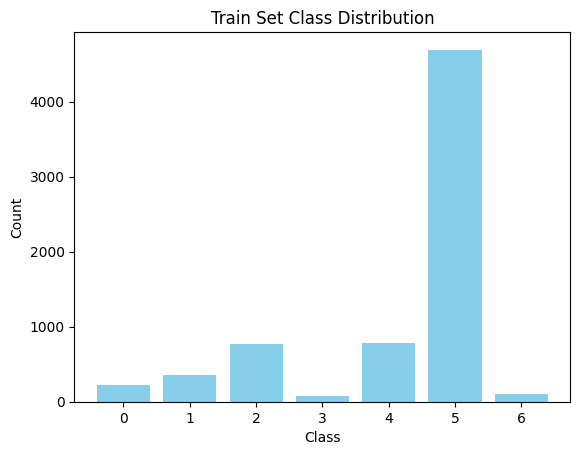

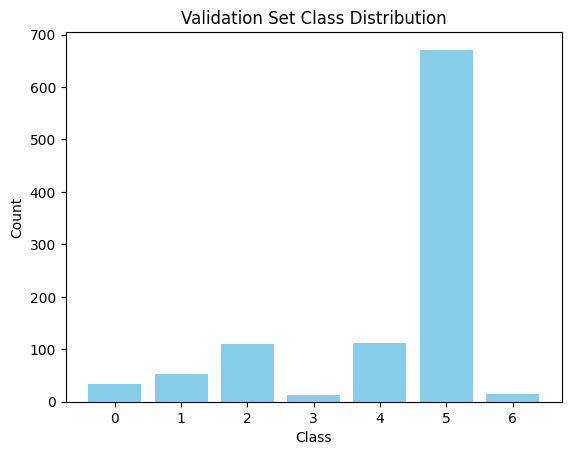

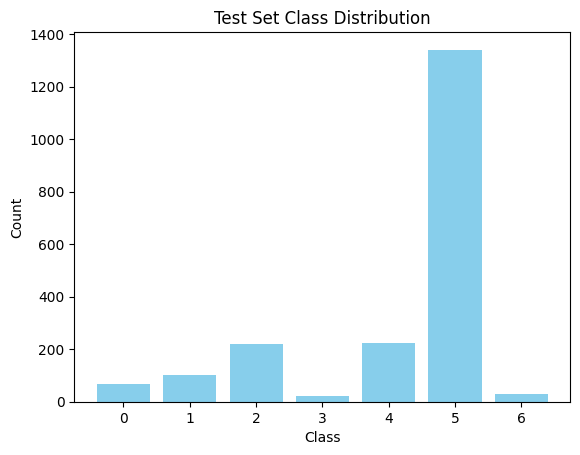

In [ ]:
# import numpy as np
# get_class_imbalance()

In [56]:
from imblearn.over_sampling import SMOTE

X = train_images.reshape(train_images.shape[0], -1)  # Flatten images
y = train_labels

In [57]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [58]:
X_resampled.shape

(32851, 2352)

In [60]:
X_resampled.reshape(-1, 3, 28, 28).shape

(32851, 3, 28, 28)

In [62]:
y_resampled.shape

(32851,)

In [ ]:
# print(X_resampled[0])

[158 111 117 ... 173 145 142]


In [ ]:
train_images = X_resampled.reshape(
    -1, 3, 28, 28
)  # Replace 28, 28 with actual dimensions
train_labels = y_resampled
# print(len(train_images))

32851


<class 'list'>
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
Train Set:
Class Counts: Counter({0: 4693, 5: 4693, 4: 4693, 2: 4693, 1: 4693, 6: 4693, 3: 4693})
Imbalance Ratio: 1.00
Entropy: 2.81

Validation Set:
Class Counts: Counter({5: 671, 4: 111, 2: 110, 1: 52, 0: 33, 6: 14, 3: 12})
Imbalance Ratio: 55.92
Entropy: 1.63

Test Set:
Class Counts: Counter({5: 1341, 4: 223, 2: 220, 1: 103, 0: 66, 6: 29, 3: 23})
Imbalance Ratio: 58.30
Entropy: 1.63



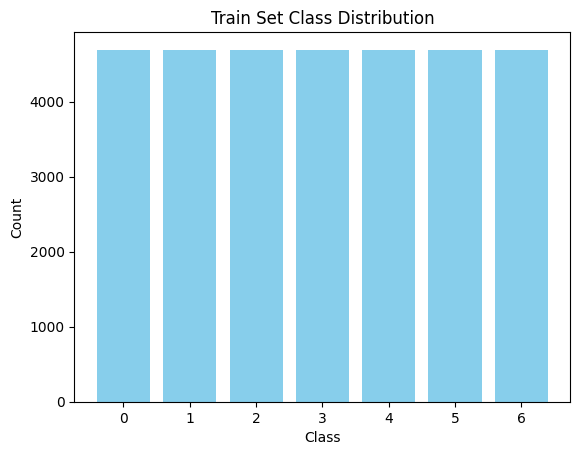

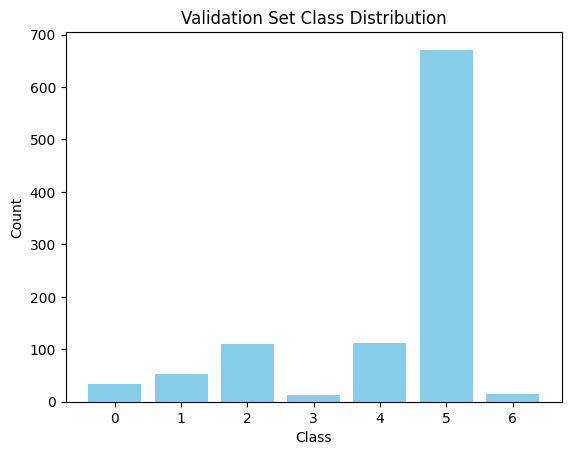

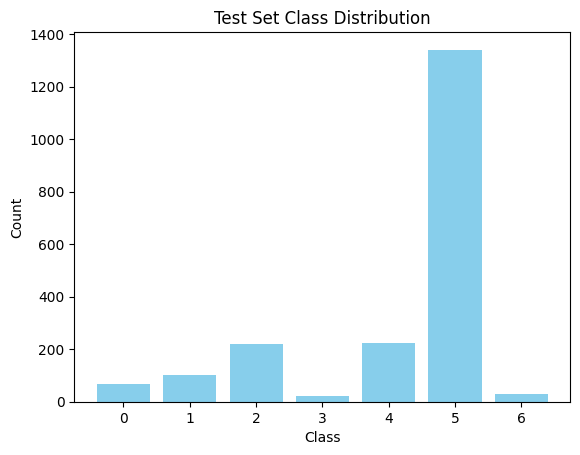

In [ ]:
# get_class_imbalance()

In [ ]:
train_len = len(train_images)
val_len = len(val_images)
test_len = len(test_images)
# print(train_len)

32851


In [65]:
# generate ids array
train_ids = [f"train_{i}" for i in range(train_len)]
val_ids = [f"val_{i}" for i in range(val_len)]
test_ids = [f"test_{i}" for i in range(test_len)]

In [66]:
train_images = list(train_images)
val_images = list(val_images)
test_images = list(test_images)

In [67]:
train_labels = list(train_labels)
val_labels = list(val_labels)
test_labels = list(test_labels)

In [ ]:
# print(len(train_images))
# print(len(train_labels))
# print(len(train_ids))

32851
32851
32851


In [69]:
# construct a df for each of the splits
import pandas as pd

train_df = pd.DataFrame(
    {
        "id": train_ids,
        "image": train_images,
        "label": train_labels,
    }
)
test_df = pd.DataFrame(
    {
        "id": test_ids,
        "image": test_images,
        "label": test_labels,
    }
)
val_df = pd.DataFrame(
    {
        "id": val_ids,
        "image": val_images,
        "label": val_labels,
    }
)

In [ ]:
# train_df.to_pickle("../data/01_raw/train.pkl")
# test_df.to_pickle("../data/01_raw/test.pkl")
# val_df.to_pickle("../data/01_raw/val.pkl")

In [10]:
train_df_loaded = pd.read_pickle("../data/01_raw/train.pkl")

In [70]:
train_df_loaded["image"].iloc[0].shape

(28, 28, 3)

In [71]:
def normalizing_images(data: pd.DataFrame) -> pd.DataFrame:
    data["image"] = data["image"].apply(lambda x: x / 255.0)
    return data

In [72]:
train_df_loaded_new = normalizing_images(train_df_loaded)
train_df_loaded_new

,id,image,label
0,train_0,"[[[0.6196078431372549, 0.43529411764705883, 0....",[0]
1,train_1,"[[[0.9019607843137255, 0.43529411764705883, 0....",[5]
2,train_2,"[[[0.8980392156862745, 0.611764705882353, 0.67...",[5]
3,train_3,"[[[0.8941176470588236, 0.4980392156862745, 0.4...",[5]
4,train_4,"[[[0.8470588235294118, 0.7372549019607844, 0.7...",[4]
...,...,...,...
7002,train_7002,"[[[0.788235294117647, 0.4980392156862745, 0.56...",[5]
7003,train_7003,"[[[0.8941176470588236, 0.47843137254901963, 0....",[5]
7004,train_7004,"[[[0.0784313725490196, 0.07058823529411765, 0....",[2]
7005,train_7005,"[[[0.6705882352941176, 0.5529411764705883, 0.6...",[5]


In [73]:
from torchvision import transforms


def tensoring_resizing(data: pd.DataFrame) -> pd.DataFrame:
    transform = transforms.Compose(
        [transforms.ToPILImage(), transforms.Resize((28, 28)), transforms.ToTensor()]
    )

    data["image"] = data["image"].apply(lambda x: transform(x).permute(1, 2, 0).numpy())
    return data

In [74]:
train_df_loaded_new = tensoring_resizing(train_df_loaded_new)
train_df_loaded_new["image"].iloc[0].shape

(28, 28, 3)

In [75]:
%load_ext kedro.ipython

[11/18/24 23:20:28] INFO     Using                                                                  ]8;id=668153;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=668466;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\framework\project\__init__.py#249\249]8;;\
                             'c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\framewor                
                             k\project\rich_logging.yml' as logging configuration.                                 

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=613074;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=900411;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=234035;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=844850;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as: c:\Users\Admin\Desktop\onco-derm-ai.         ]8;id=462397;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=103671;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#175\175]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/18/24 23:20:31] INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=566768;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=186476;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#62\62]8;;\

                    WARNING  No 'mlflow.yml' config file found in environment. Default            ]8;id=574953;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=937945;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#75\75]8;;\
                             configuration will be used. Use ``kedro mlflow init`` command in CLI                  
                             to customize the configuration.                                                       

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=410181;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=321065;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/Admin/Desktop/onco-derm-ai/mlruns'                                  

                    WARNING  Malformed experiment '312469223918544298'. Detailed error Yaml file  ]8;id=50111;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\store\tracking\file_store.py\file_store.py]8;;\:]8;id=525481;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\store\tracking\file_store.py#331\331]8;;\
                             'C:\Users\Admin\Desktop\onco-derm-ai\mlruns\312469223918544298\meta.                  
                             yaml' does not exist.                                                                 
                             ╭─────────────── Traceback (most recent call last) ────────────────╮                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:327 in search_experiments             │                  
                             │                                                                  │                  
                             │    324 │   │   for exp_id in experiment_ids:                     │                  
                             │    325 │   │   │   try:                                          │                  
                             │    326 │   │   │   │   # trap and warn known issues, will raise  │                  
                             │ ❱  327 │   │   │   │   exp = self._get_experiment(exp_id, view_t │                  
                             │    328 │   │   │   │   if exp is not None:                       │                  
                             │    329 │   │   │   │   │   experiments.append(exp)               │                  
                             │    330 │   │   │   except MissingConfigException as e:           │                  
                             │                                                                  │                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:421 in _get_experiment                │                  
                             │                                                                  │                  
                             │    418 │   │   │   │   f"Could not find experiment with ID {expe │                  
                             │    419 │   │   │   │   databricks_pb2.RESOURCE_DOES_NOT_EXIST,   │                  
                             │    420 │   │   │   )                                             │                  
                             │ ❱  421 │   │   meta = FileStore._read_yaml(experiment_dir, FileS │                  
                             │    422 │   │   meta["tags"] = self.get_all_experiment_tags(exper │                  
                             │    423 │   │   experiment = _read_persisted_experiment_dict(meta │                  
                             │    424 │   │   if experiment_id != experiment.experiment_id:     │                  
                             │                                                                  │                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:1367 in _read_yaml                    │                  
                             │                                                                  │                  
                             │   1364 │   │   │   │   time.sleep(0.1 * (3 - attempts_remaining) │                  
                             │   1365 │   │   │   │   return _read_helper(root, file_name, atte │                  
                             │   1366 │   │                                                     │                  
                             │ ❱ 1367 │   │  

[11/18/24 23:20:32] WARNING  Malformed experiment '312469223918544298'. Detailed error Yaml file  ]8;id=547322;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\store\tracking\file_store.py\file_store.py]8;;\:]8;id=206858;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\store\tracking\file_store.py#331\331]8;;\
                             'C:\Users\Admin\Desktop\onco-derm-ai\mlruns\312469223918544298\meta.                  
                             yaml' does not exist.                                                                 
                             ╭─────────────── Traceback (most recent call last) ────────────────╮                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:327 in search_experiments             │                  
                             │                                                                  │                  
                             │    324 │   │   for exp_id in experiment_ids:                     │                  
                             │    325 │   │   │   try:                                          │                  
                             │    326 │   │   │   │   # trap and warn known issues, will raise  │                  
                             │ ❱  327 │   │   │   │   exp = self._get_experiment(exp_id, view_t │                  
                             │    328 │   │   │   │   if exp is not None:                       │                  
                             │    329 │   │   │   │   │   experiments.append(exp)               │                  
                             │    330 │   │   │   except MissingConfigException as e:           │                  
                             │                                                                  │                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:421 in _get_experiment                │                  
                             │                                                                  │                  
                             │    418 │   │   │   │   f"Could not find experiment with ID {expe │                  
                             │    419 │   │   │   │   databricks_pb2.RESOURCE_DOES_NOT_EXIST,   │                  
                             │    420 │   │   │   )                                             │                  
                             │ ❱  421 │   │   meta = FileStore._read_yaml(experiment_dir, FileS │                  
                             │    422 │   │   meta["tags"] = self.get_all_experiment_tags(exper │                  
                             │    423 │   │   experiment = _read_persisted_experiment_dict(meta │                  
                             │    424 │   │   if experiment_id != experiment.experiment_id:     │                  
                             │                                                                  │                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:1367 in _read_yaml                    │                  
                             │                                                                  │                  
                             │   1364 │   │   │   │   time.sleep(0.1 * (3 - attempts_remaining) │                  
                             │   1365 │   │   │   │   return _read_helper(root, file_name, atte │                  
                             │   1366 │   │                                                     │                  
                             │ ❱ 1367 │   │ 

2024/11/18 23:20:32 INFO mlflow.tracking.fluent: Experiment with name 'onco_derm_ai' does not exist. Creating a new experiment.


                    WARNING  Malformed experiment '312469223918544298'. Detailed error Yaml file  ]8;id=634528;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\store\tracking\file_store.py\file_store.py]8;;\:]8;id=800143;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\store\tracking\file_store.py#331\331]8;;\
                             'C:\Users\Admin\Desktop\onco-derm-ai\mlruns\312469223918544298\meta.                  
                             yaml' does not exist.                                                                 
                             ╭─────────────── Traceback (most recent call last) ────────────────╮                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:327 in search_experiments             │                  
                             │                                                                  │                  
                             │    324 │   │   for exp_id in experiment_ids:                     │                  
                             │    325 │   │   │   try:                                          │                  
                             │    326 │   │   │   │   # trap and warn known issues, will raise  │                  
                             │ ❱  327 │   │   │   │   exp = self._get_experiment(exp_id, view_t │                  
                             │    328 │   │   │   │   if exp is not None:                       │                  
                             │    329 │   │   │   │   │   experiments.append(exp)               │                  
                             │    330 │   │   │   except MissingConfigException as e:           │                  
                             │                                                                  │                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:421 in _get_experiment                │                  
                             │                                                                  │                  
                             │    418 │   │   │   │   f"Could not find experiment with ID {expe │                  
                             │    419 │   │   │   │   databricks_pb2.RESOURCE_DOES_NOT_EXIST,   │                  
                             │    420 │   │   │   )                                             │                  
                             │ ❱  421 │   │   meta = FileStore._read_yaml(experiment_dir, FileS │                  
                             │    422 │   │   meta["tags"] = self.get_all_experiment_tags(exper │                  
                             │    423 │   │   experiment = _read_persisted_experiment_dict(meta │                  
                             │    424 │   │   if experiment_id != experiment.experiment_id:     │                  
                             │                                                                  │                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:1367 in _read_yaml                    │                  
                             │                                                                  │                  
                             │   1364 │   │   │   │   time.sleep(0.1 * (3 - attempts_remaining) │                  
                             │   1365 │   │   │   │   return _read_helper(root, file_name, atte │                  
                             │   1366 │   │                                                     │                  
                             │ ❱ 1367 │   │ 

[11/18/24 23:20:33] WARNING  Malformed experiment '312469223918544298'. Detailed error Yaml file  ]8;id=389858;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\store\tracking\file_store.py\file_store.py]8;;\:]8;id=772187;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\store\tracking\file_store.py#331\331]8;;\
                             'C:\Users\Admin\Desktop\onco-derm-ai\mlruns\312469223918544298\meta.                  
                             yaml' does not exist.                                                                 
                             ╭─────────────── Traceback (most recent call last) ────────────────╮                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:327 in search_experiments             │                  
                             │                                                                  │                  
                             │    324 │   │   for exp_id in experiment_ids:                     │                  
                             │    325 │   │   │   try:                                          │                  
                             │    326 │   │   │   │   # trap and warn known issues, will raise  │                  
                             │ ❱  327 │   │   │   │   exp = self._get_experiment(exp_id, view_t │                  
                             │    328 │   │   │   │   if exp is not None:                       │                  
                             │    329 │   │   │   │   │   experiments.append(exp)               │                  
                             │    330 │   │   │   except MissingConfigException as e:           │                  
                             │                                                                  │                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:421 in _get_experiment                │                  
                             │                                                                  │                  
                             │    418 │   │   │   │   f"Could not find experiment with ID {expe │                  
                             │    419 │   │   │   │   databricks_pb2.RESOURCE_DOES_NOT_EXIST,   │                  
                             │    420 │   │   │   )                                             │                  
                             │ ❱  421 │   │   meta = FileStore._read_yaml(experiment_dir, FileS │                  
                             │    422 │   │   meta["tags"] = self.get_all_experiment_tags(exper │                  
                             │    423 │   │   experiment = _read_persisted_experiment_dict(meta │                  
                             │    424 │   │   if experiment_id != experiment.experiment_id:     │                  
                             │                                                                  │                  
                             │ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\mlflow\st │                  
                             │ ore\tracking\file_store.py:1367 in _read_yaml                    │                  
                             │                                                                  │                  
                             │   1364 │   │   │   │   time.sleep(0.1 * (3 - attempts_remaining) │                  
                             │   1365 │   │   │   │   return _read_helper(root, file_name, atte │                  
                             │   1366 │   │                                                     │                  
                             │ ❱ 1367 │   │ 

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=10724;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=489391;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/18/24 23:20:34] INFO     Kedro project onco-derm-ai                                             ]8;id=799680;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=492310;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=57048;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=70686;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[11/18/24 23:20:35] INFO     Registered line magic 'run_viz'                                        ]8;id=105434;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=589586;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [2]:
from kedro.io.data_catalog import DataCatalog

catalog = DataCatalog.from_config("../conf/base/catalog.yml")

AttributeError: 'str' object has no attribute 'items'

In [79]:
catalog.save("train_raw", train_df)
# catalog.save("test_raw", test_df)
# catalog.save("val_raw", val_df)

[11/18/24 23:22:45] INFO     Saving data to train_raw (PickleDataset)...                        ]8;id=442397;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=280840;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 catalog.save("train_raw", train_df)                                                          │
│   2 # catalog.save("test_raw", test_df)                                                          │
│   3 # catalog.save("val_raw", val_df)                                                            │
│   4                                                                                              │
│                                                                                                  │
│ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py:588 in save      │
│                                                                                                  │
│ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\core.py:727 in save              │
│                                                                                                  │
│ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\core.py:249 in save              │
│                                                                                                  │
│ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro_datasets\pickle\pickle_dataset.py:2 │
│ 25 in _save                                                                                      │
│                                                                                                  │
│ c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\core.py:704 in _get_save_path    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
DatasetError: Save path 
'C:/Users/Admin/Desktop/onco-derm-ai/data/01_raw/train.pkl/2024-11-18T17.50.33.688Z/train.pkl' for 
PickleDataset(backend=pickle, filepath=C:/Users/Admin/Desktop/onco-derm-ai/data/01_raw/train.pkl, load_args={}, 
protocol=file, save_args={}, version=Version(load=None, save='2024-11-18T17.50.33.688Z')) must not exist if 
versioning is enabled.

In [83]:
df = catalog.load("train_raw")

[11/18/24 23:30:16] INFO     Loading data from train_raw (PickleDataset)...                     ]8;id=796949;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=118779;file://c:\Users\Admin\miniconda3\envs\MlOps\lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [84]:
df

,id,image,label
0,train_0,"[[[158, 111, 117, 161, 116, 121, 164, 121, 130...",0
1,train_1,"[[[230, 111, 105, 226, 107, 99, 225, 106, 98, ...",5
2,train_2,"[[[229, 156, 173, 229, 156, 173, 227, 156, 174...",5
3,train_3,"[[[228, 127, 115, 224, 126, 113, 223, 125, 112...",5
4,train_4,"[[[216, 188, 187, 217, 189, 188, 220, 192, 191...",4
...,...,...,...
32846,train_32846,"[[[220, 155, 157, 220, 154, 156, 222, 248, 155...",6
32847,train_32847,"[[[37, 228, 147, 39, 230, 148, 39, 230, 238, 3...",6
32848,train_32848,"[[[189, 161, 208, 189, 161, 208, 191, 160, 175...",6
32849,train_32849,"[[[159, 107, 128, 246, 106, 128, 248, 103, 129...",6


In [81]:
df["image"][0].shape

(3, 28, 28)

In [82]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
device

device(type='cuda')